<a href="https://colab.research.google.com/github/sam1610/MimiProjects/blob/main/plateau_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from random import *
import matplotlib.pyplot as plt 
import copy


def liste_quad(l, c):
  liste=[]
  #verticale 
  for j in range(0 , c):
      for i in range(0, l-3): #Bien controler la premiere case pour éviter le dépassement des bornes de la grille 
        liste.append([(i,j),(i+1,j),(i+2,j),(i+3,j)])
  #horisontale
  for i in range(0 , l):
    for j in range(0, c-3):
      liste.append([(i,j),(i,j+1),(i,j+2),(i,j+3)])

  #Diagonale 1 (du haut vers le bas)
  for i in range(0 , l-3):
    for j in range(0, c-3):
      liste.append([(i,j),(i+1,j+1),(i+2,j+2),(i+3,j+3)])

  #diagonale 2 (du bas vers le haut)
  for i in range(0, l-3):
    for j in range(3, c):
      liste.append([(i,j),(i+1,j-1),(i+2,j-2),(i+3,j-3)])
  return liste



# lil= liste_quad(6,7)
# print(len(lil))
# plateau = np.zeros((6, 7), dtype=int)
# quadruplet = liste_quad(l=6,c=7)

# for a,b,c,d in quadruplet:
#   print(plateau[a])
#   print(plateau[b])
#   print(plateau[c])
#   print(plateau[d])

In [ ]:
class Joueur():
	

	def __init__(self,couleur_j):
		if couleur_j == "bleu":
			self.valeur = 1
		else:
			self.valeur=-1	
	
	def play(self,plateau):
		# print("play1")
		liste=[] #Toutes les coups (colonnes) possibles 
		for i in range(plateau.c): #Parcourir toutes les colonnes 
			if plateau.grille[0][i]== 0: #Verifier si la colonne est valable 
				liste.append(i)
		return liste[randint(0,len(liste)-1)]

In [ ]:
class Plateau():
	

	def __init__(self, l, c):
		self.l=l
		self.c=c
		self.quad= liste_quad(l, c)
		self.reset(l, c)

	def reset(self, l, c):
		self.grille=np.zeros((l, c), dtype=int)

	def has_won(self, player): 
		# print("has won")
		#J represente le joueur 1 ou -1 
		#Parourir la liste des coordonees dans la liste quad
		for i,j,k,z in self.quad:
			a,b,e,d = self.grille[i], self.grille[j], self.grille[k], self.grille[z]
			if a==b==e==d==player:
				return True
		return False


	def play(self, x, joueur):
		# print("play 2")
		for i in range(self.l - 1, -1, -1):
			if self.grille[i][x]==0:
				self.grille[i][x]= joueur 
				break

	def is_finished(self, j1, j2):
		# print("is_finished")
		if self.has_won(j1) or self.has_won(j2):
			return True 
		else:
			for i in range(self.l):
				for k in range(self.c):
					if self.grille[i,k] == 0:
						return False
		return True #personne n'a gagne et on ne peut pas continuer a jouer

	def run(self, joueur1, joueur2):

		fini= self.is_finished(joueur1, joueur2) 
		# print(fini)
		j1= Joueur("bleu")
		j2= Joueur("rouge")
		nb_coups_j1=0 #Le nombre de coups avant de gagner pour j1
		nb_coups_j2=0 #Le nombre de coups avant de gagner pour j2
		cpt=0 
		while(not fini):
			if cpt%2==0:
				#J1 joue
				col= j1.play(self) #Determiner la colonne choisie par le joueur 1 
				self.play(col, j1.valeur) #Le joueur j1 joue 
				nb_coups_j1+=1 #Nombre déssayes augmente
			else: 
				#J2 joue 
				col= j2.play(self) #Determiner la colonne choisie par le joueur 1 
				self.play(col, j2.valeur) #Le joueur j1 joue 
				nb_coups_j2+=1 #Nombre déssayes augmente		
			cpt+=1 	
			fini= self.is_finished(joueur1, joueur2) #Verifier si le jeu est fini 
				
		#Fin du while 

		#Verifeir lequel des joeueur a gagné 
		if self.has_won(joueur1):
			# print("le joueur", joueur1, "a gegné")
			return (1,nb_coups_j1) 
		elif self.has_won(joueur2): 
			# print("le joueur", joueur2, "a gegné")
			return (-1,nb_coups_j2)
		else: 
			# print("Aucun des deux joueurs n'a gegné ")
			return 0,0
	


0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1


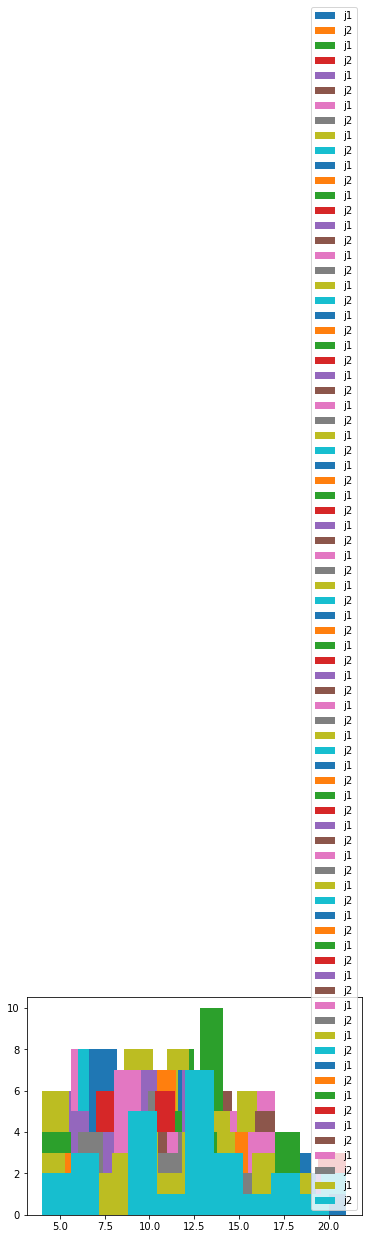

In [ ]:
plateau= Plateau(6, 7)
# print(plateau)

def modeliser():
  L1=[]
  L2=[]
  nb_fois_gagné1=0
  nb_fois_gagné2=0
  partie_nulle=0 
  for i in range(50):
    plateau= Plateau(6, 7)
    r= plateau.run(1, -1)
    if r[0]==1:
      L1.append(r[1])
      nb_fois_gagné1+=1
    elif r[0]==-1:
      L2.append(r[1])
      nb_fois_gagné2+=1
    else: 
      partie_nulle+=1 
  plt.hist(L1, label="j1")
  plt.hist(L2, label="j2")
  # print(L1)
  # print(L2)
  # print("nb fois gagné 1", nb_fois_gagné1)
  # print("nb fois gagné 2", nb_fois_gagné2)
  print(partie_nulle)
  plt.legend()
  plt.show 

for i in range(40): 
  modeliser()

In [ ]:
class Monte_Carlo():

  def __init__(self, joueur): #Joueur est un objet de la classe Joueur
    self.joueur=joueur.valeur

  def Colonne_aleatoire(self, plateau):
    liste_col=[]
    for i in range(plateau.c):
      if plateau.grille[0][i]==0:
        liste_col.append(i)
    return liste_col[randint(0,len(liste_col)-1)] #retourner une colonne aleatoire


  def Monte_Carlo(self, etat, adv, N):
    """Fonction qui trouve la meilleure colonne a jouer""" 
    lst=[] 
    for i in range(0, etat.c):
      lst.append([i, 0, 0]) #Liste contenant les actions en forme de listes pouvoir calculer la moyenne

    #Creation d'une copie de l'etat passe en argument 
    copy_grille= Plateau(etat.l, etat.c)

    for s in range(0,N):
      copy_grille.grille= copy.deepcopy(etat.grille)#Revenir a l'etat initiale 
      #choisir une colonne aleatoire
      col= self.Colonne_aleatoire(etat) 

      #Le joueur Monte-Carlo joue dans la colonne col 
      copy_grille.play(col, self.joueur)

      #Incrementer le nb de fois aue la colonne col a ete choisie 
      lst[col][2]+=1 

      #Les joueurs continuent a jouer aleatoirement 
      res= copy_grille.run(self.joueur, adv) 

      if res[0] == self.joueur:#Si le joueur Monte-carlo a gagne on augmente le nombre 
        lst[col][1]+=1 #Incrementer le nombre de victoires du joueur monte carlo 
    #Sortie de la boucle for

    #Trouver les moyennes 
    liste_moy=[]
    for a in lst:
      if a[2] !=0: #Pour eviter une division par 0
        liste_moy.append(a[1]/a[2])
    max=0
    col_choisie=0
    for b in range(len(liste_moy)):
      if liste_moy[b]>max:
        max=liste_moy[b]
        col_choisie=b 
    print("finiszh")
    return col_choisie

  def run_Monte_carlo(self, Joueur_Ad, obj_adv, pl, is_alea):
    """ Fonction d'un jeu entre un joueur monte_carlo et un autre joueur (monte_caro ou aleatoire) qui renvoie le joueur gagna avec le nombre de coups """
    finish= pl.is_finished(self.joueur, Joueur_Ad)
    cp=0 #Compteur pour alterner entre joueur 1 et 2 
    nb_coupsj1=0
    nb_coupsj2=0


    while(not finish):
      #Tant que le jeu n'est pas terminé les joeuurs jouent

      if cp%2==0: #Le joueur monte carlo joue 
        print("hi")
        #Generation de copie de l'etat 
        col= self.Monte_Carlo(pl,Joueur_Ad, 20) #La meilleure colonne est choisie 
        pl.play(col, self.joueur) #Le joueur joue
        print( "Jeu monte carlo", pl.grille)
        nb_coupsj1+=1

      #Sinon c'est l'adversaire qui joue 
      elif is_alea: #Si le joueur adversaire est un joueur aleatoire 
        #Determiner dans quelle colonnes le joueur aleatoire va jouer en utilisant la fonction play dans la classe Joueur  
        col= obj_adv.play(pl) 
        pl.play(col, Joueur_Ad) 
        nb_coupsj2+=1
      
      else: #Jouer contre un joueur monte carlo 
        col= obj_adv.Monte_Carlo(pl,self.joueur , 20)
        pl.play(col, Joueur_Ad)
        nb_coupsj2+=1
      cp+=1
      print(pl)
      finish= pl.is_finished(self.joueur, Joueur_Ad)
      print(finish)

		#Verifeir lequel des joeueur a gagné 
    if pl.has_won(self.joueur):
      print("Le joueu", self.joueur, "a gagné ")
      return (self.joueur,nb_coupsj1) 
    elif pl.has_won(Joueur_Ad):
      print("Le joueu", Joueur_Ad, "a gagné ")
      return (Joueur_Ad,nb_coupsj2)
    
    print("Aucun des deux joueurs n'a gagné ")
    return 0


Streaming output truncated to the last 5000 lines.
False
hi
finiszh
Jeu monte carlo [[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [ 1  0 -1  0  0  0  0]]
False
False
hi
finiszh
Jeu monte carlo [[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]
 [ 1 -1 -1  0  0  0  0]]
False
False
hi
finiszh
Jeu monte carlo [[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]
 [ 1 -1 -1  1  0  0  0]]
False
False
hi
finiszh
Jeu monte carlo [[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1 -1  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]
 [ 1 -1 -1  1  0  0 -1]]
False
False
hi
finiszh
Jeu monte carlo [[ 0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0]
 [ 1 -1  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]
 [ 1 -1 -1  1  0  0 -1]]
False
False
hi
finiszh
Jeu monte ca

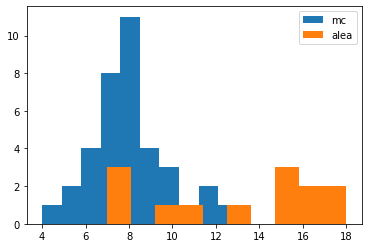

In [ ]:
# Test pour un joeur Monte_Carlo contre lui meme

# Instanciation du joueur Monte_carlo 

j1= Joueur("bleu") #Le joueur Monte_carlo 
j2= Joueur("Rouge")
#Instatiation monte_carlo 
mc= Monte_Carlo(j1)
# mc1= Monte_Carlo(j2)
lmont=[]
ladv=[]


p= Plateau(6,7) #Initialisation du plateau vide au debut 
for k in range(50):
  p= Plateau(6,7) 
  res= mc.run_Monte_carlo(j2.valeur, j2 ,p, True)
  if res[0]==mc.joueur:
    lmont.append(res[1])
  else:
    ladv.append(res[1])

plt.hist(lmont, label="mc")
plt.hist(ladv, label="alea")
plt.legend()
plt.show
print(lmont)
print(ladv)

In [ ]:
class Levier():

  def __init__(self, N_levier):
    self.N_levier= N_levier
    #Creation de la liste des parametres de Bernouli 
    self.proba_levier =[]
    for i in range(0,N_levier):
      self.proba_levier.append(np.random.random())
        
  def gain(self, num_levier):
    p= self.proba_levier[num_levier] #Recuperer le rendement associé à ce levier
    #tirage d'une valeur aléatoire dans la liste de probabilité
    p_random = self.proba_levier[(randint(0, self.N_levier - 1))] 
    if (p_random<=p):
      #si gagnant retourné 1 sinon 0
      return 1
    return 0

  def aleatoire(self ,liste_recomp, liste_Ni, T):
    """ Algorithme qui choisi une action aleatoire parmis N, joue T parties et renvoie le regret associé"""
    gain_m= 0  
    gain_action=0
    action_max= np.argmax(self.proba_levier) #L'action ayant la plus grande probabilité (Meuilleure action à choisir)
    for i in range(T): #On joue T parties 
      #Choisir une ction aleatoire à chaque nouvelle partie
      a = randint(0, self.N_levier  - 1 )
      #Trouver le gain binaire de l'action a 
      g= self.gain(a)
      gain_action+=g #Gain totale à la fin de T partie joués 
      liste_recomp[a]+=g
      #Mise à jour de la liaste es Ni 
      liste_Ni[a]+=1 
      gain_m += self.gain(action_max)
    
    regret = gain_m - gain_action 
    return regret 


  def glouton(self, liste_recomp, liste_Ni, T):
    #Suopposons qu'on va jouer 50 parties 
    gain_m=0
    gain_action=0
    action_max= np.argmax(self.proba_levier) #Láction ayant la plus grande probabilité (Meuilleure action à choisir)
    explore= int(T*0.2) #20% des iterations sont passée à l'exploration 
    #Commencer par l'exploration de tout les leviers 
    #Soit 20 le nombre d'itérations consacrés à l'exploration 
    for i in range(explore):
      a = randint(0, self.N_levier  - 1 ) 
      g=self.gain(a)
      gain_m+= self.gain(action_max)
      gain_action+=g
      liste_recomp[a]+=g 
      liste_Ni[a]+=1 
    #Choisir le levier qui a le rendement le plus elevé 
    best_levier= np.argmax(liste_recomp)
    T= T-explore #On joue le reste des parties 
    for i in range(T): #Utiliser que ce levier pour le reste des T parties 
      g=self.gain(best_levier)
      gain_m+= self.gain(action_max)
      gain_action+=g
      liste_recomp[best_levier]+=g 
      liste_Ni[best_levier]+=1 
    
    return gain_m - gain_action, best_levier
     

  def E_greedy(self, liste_recomp, liste_Ni, E, T):
    gain_m=0
    gain_action=0
    action_max= np.argmax(self.proba_levier)
    #Achaque iteration on vérifie si la probabilité est satisfaite ou pas 
    for i in range(T):
      #On cherche le gain de l'action maximale dans tout les cas 
      gain_m+=self.gain(action_max)
      alea= np.random.random()
      if alea<E:
        #On choisie aleatoirement 
        a=randint(0, self.N_levier  - 1 )
        g= self.gain(a)
        gain_action+=g 
        liste_recomp[a]+=g 
        liste_Ni[a]+=1 
      else: 
        #On applique l'algorithme greedy pour trouver láction ayant la recompense la plus élévée 
        reg, best_action= self.glouton(liste_recomp, liste_Ni, T)
        g= self.gain(best_action)
        gain_action+=g 
        liste_recomp[best_action]+=g 
        liste_Ni[best_action]+=1
    return gain_m - gain_action


  def ucb(self, liste_recomp, liste_Ni, T):

    #Selection d'un levier ayant le plus grand Ui 
    #Commencer à jouter les parties de 1 à T+1 
    gain_m=0
    gain_action=0
    action_max=np.argmax(self.proba_levier)

    for t in range(1,T): 
      #L'action optimale joue
      gain_m+=self.gain(action_max)

      #Choisir une action  
      res=[] #Liste qui va contenir les resultats de la formule permettant de choisir une action 
      for i in range(len(liste_Ni)):
        #Appliquer la formule seulement si N[i] n'est pas null 
        if liste_Ni[i] ==0:
          res.append(0) 
        else:
          res.append(liste_recomp[i] + np.sqrt(2*np.log(t)/liste_Ni[i]))
      a= np.argmax(res)
      g=self.gain(a)
      liste_recomp[a]+=g
      liste_Ni[a]+=1
      gain_action+=g 
    return gain_m - gain_action 
        







  # def ucb(self, liste_recomp, liste_Ni):
  #   """
  #   L'algorithme Upper Confidence Bound.
  #   """
  #   i = 0
  #   while i < len(liste_Ni):
  #       if liste_Ni[i] < 1: #Pour garantir l'exploration, jouer une actions si son Ni=0 
  #           return i
  #       else:
  #           i+= 1
  #   t = liste_Ni.sum()

  #   lres=[]
  #   for j in len(liste_recomp): 
  #     lres.append(liste_recomp[j] + np.sqrt(2*np.log(t)/liste_Ni[j]))
  #   return np.argmax(lres)



[50, 100, 150, 200, 250, 300, 350]


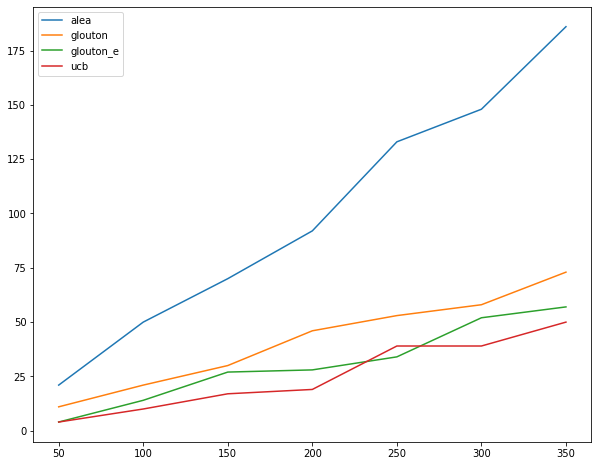

In [ ]:
levier = Levier(50)  
rec= [] 
for i in range(50): 
  rec.append(np.random.random())
Ni= [0]*50
regret_g=[]
regret_a=[]
regret_e=[]
regret_ucb=[]
T=[]
#Test algorithme aleatoire avec variations de T 
for t in range(50, 400, 50): 
  T.append(t)
  regret_g.append( (levier.glouton(rec, Ni, t))[0])
  regret_a.append( (levier.aleatoire(rec, Ni, t)))
  regret_e.append(levier.E_greedy(rec, Ni, 0.1, t))
  regret_ucb.append( levier.ucb(rec, Ni, t))



print(T)
plt.figure(figsize=(10, 8))
plt.plot(T, regret_a, label="alea" )
plt.plot(T, regret_g, label="glouton")
plt.plot(T, regret_e, label="glouton_e")
plt.plot(T, regret_ucb, label="ucb")

plt.legend()
plt.show()



In [ ]:
class UCT:

  def __init__():
    self.liste_enfants={}
    self.nb_victoire=0
    self.nb_visite=0 


  def uct(self, etat): 
    
    

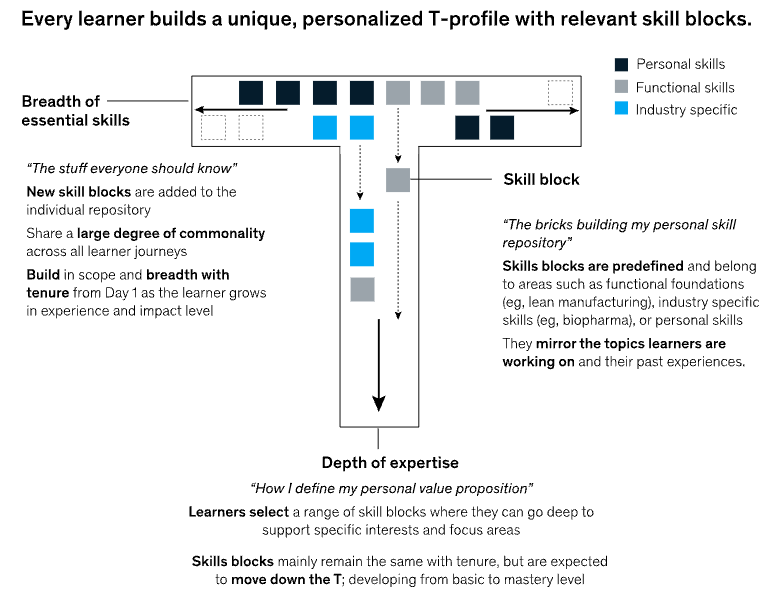